In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [133]:
df=pd.read_csv("Diabetes.csv")

In [179]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [177]:
x=df.drop('Outcome',axis = 1)
y=df['Outcome']

In [180]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [187]:
X_scaled_train,X_scaled_test,Y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state=1)
model_with_scaling = KNeighborsClassifier(n_neighbors=5)
model_with_scaling.fit(X_scaled_train,Y_train)
y_predict = model_with_scaling.predict(X_scaled_test)
print(accuracy_score(y_predict, y_test))

0.7878787878787878


In [188]:
#Evaluation Metrics
#Comparitive Measures Used:
#1) Accuracy : Correct Prediction / Total Predictions
#2) Precision : TP/( TP + FP)
#3) Recall : TP / ( TP + FN)
#4) F-Score : 2 ( Recall * Precision) / (Recall+Precision)
#TP = 'True Positives', TN = 'True Negatives' , FP = 'False Positive' , FN = 'False Negative'

In [189]:
knn_accuracy=accuracy_score(y_test,y_predict)
knn_accuracy

0.7878787878787878

In [190]:
knn=precision_recall_fscore_support(y_test, y_predict, average='binary')
knn

(0.75, 0.6352941176470588, 0.6878980891719745, None)

In [191]:
confusion_matrix_knn = pd.crosstab(y_test , y_predict, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_knn

Predicted,0,1
Actual,,
0,128,18
1,31,54


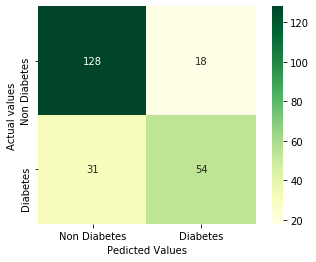

In [192]:
output=['Non Diabetes','Diabetes']
sns.heatmap(confusion_matrix_knn,square=True, annot=True,cmap="YlGn",xticklabels=output,yticklabels=output,fmt=".0f")
plt.ylabel("Actual values");
plt.xlabel("Pedicted Values");

In [193]:
# classification report
report=classification_report(y_test,y_predict,target_names=['Non Diabetes','Diabetes'],output_dict=True)
report

{'Non Diabetes': {'precision': 0.8050314465408805,
  'recall': 0.8767123287671232,
  'f1-score': 0.839344262295082,
  'support': 146},
 'Diabetes': {'precision': 0.75,
  'recall': 0.6352941176470588,
  'f1-score': 0.6878980891719745,
  'support': 85},
 'accuracy': 0.7878787878787878,
 'macro avg': {'precision': 0.7775157232704403,
  'recall': 0.756003223207091,
  'f1-score': 0.7636211757335283,
  'support': 231},
 'weighted avg': {'precision': 0.7847817800647989,
  'recall': 0.7878787878787878,
  'f1-score': 0.7836173154748909,
  'support': 231}}

In [194]:
#Naive Bayes

In [195]:
xn_train,xn_test,yn_train,yn_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [196]:
model_nominal = CategoricalNB()
model_nominal.fit(x,y)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [197]:
# Make a prediction
y_pred_nominal = model_nominal.predict(xn_test)
y_pred_nominal

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [198]:
# Evaluate the model using accuracy score
NB_accuracy = accuracy_score(yn_test,y_pred_nominal)*100
NB_accuracy

84.4155844155844

In [199]:
naive=precision_recall_fscore_support(yn_test, y_pred_nominal, average='binary')
naive

(0.8142857142857143, 0.7125, 0.7599999999999999, None)

In [200]:
confusion_matrix_na = pd.crosstab(yn_test , y_pred_nominal, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_na

Predicted,0,1
Actual,,
0,138,13
1,23,57


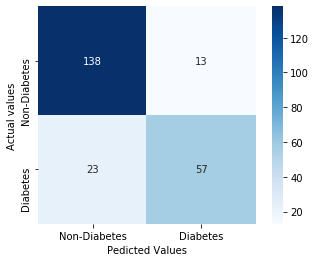

In [201]:
output=['Non-Diabetes','Diabetes']
sns.heatmap(confusion_matrix_na,square=True, annot=True,cmap="Blues",xticklabels=output,yticklabels=output,fmt=".0f")
plt.ylabel("Actual values");
plt.xlabel("Pedicted Values");

In [202]:
# classification report
report2=classification_report(yn_test,y_pred_nominal, output_dict=True)
report2

{'0': {'precision': 0.8571428571428571,
  'recall': 0.9139072847682119,
  'f1-score': 0.8846153846153846,
  'support': 151},
 '1': {'precision': 0.8142857142857143,
  'recall': 0.7125,
  'f1-score': 0.7599999999999999,
  'support': 80},
 'accuracy': 0.8441558441558441,
 'macro avg': {'precision': 0.8357142857142856,
  'recall': 0.813203642384106,
  'f1-score': 0.8223076923076922,
  'support': 231},
 'weighted avg': {'precision': 0.8423005565862708,
  'recall': 0.8441558441558441,
  'f1-score': 0.8414585414585414,
  'support': 231}}

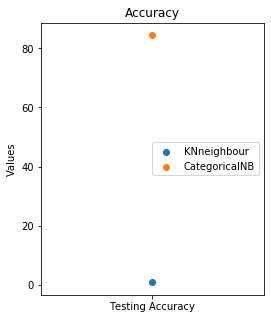

In [203]:
Accuracy=['Testing Accuracy']
Measures=['Precision','Recall','F-Score','Support']
plt.figure(figsize=(4,5))
plt.scatter(Accuracy,knn_accuracy,label="KNneighbour")
plt.scatter(Accuracy,NB_accuracy,label="CategoricalNB")
plt.ylabel("Values")
plt.title("Accuracy")
plt.legend()
plt.show()

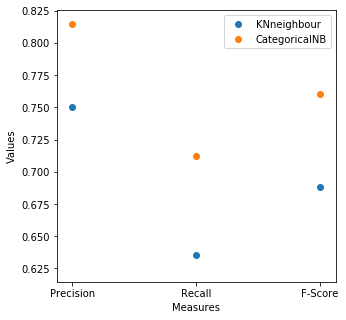

In [204]:
plt.figure(figsize=(5,5))
plt.scatter(Measures,knn,label="KNneighbour")
plt.scatter(Measures,naive,label="CategoricalNB")
plt.xlabel("Measures")
plt.ylabel("Values")
plt.legend()
plt.show()